In [1]:
%matplotlib inline
import numpy as np
import math
import matplotlib as mp
import matplotlib.pyplot as plt

from ipywidgets.widgets import interact
from scipy import  stats
import seaborn as sns
import pandas as pd



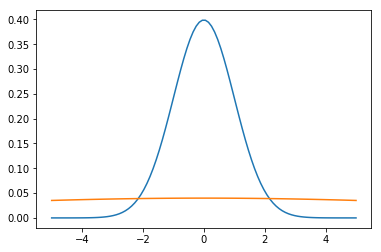

In [2]:
n0=stats.norm(0,1)
n1=stats.norm(0,10)
xi = np.linspace(-5,5,100)
#xi = np.arange(-5,5,100)

#fig,ax=subplots()
fig,ax=plt.subplots()

ax.plot(xi,n0.pdf(xi))
ax.plot(xi,n1.pdf(xi))

def bias_coin(phead = .5):
    while True:
        yield int( np.random.rand() < phead ) 

pct_mixed  = 0.1
bias_coin_gen = bias_coin(pct_mixed)        
dual_set = [n0,n1]
samples  = [ dual_set[bias_coin_gen.__next__()].rvs() for i in range(500) ]

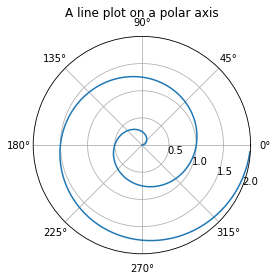

In [3]:
"""
Demo of a line plot on a polar axis.
"""
import numpy as np
import matplotlib.pyplot as plt


r = np.arange(0, 2, 0.01)
theta = 2 * np.pi * r

ax = plt.subplot(111, projection='polar')
ax.plot(theta, r)
ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2])  # less radial ticks
ax.set_rlabel_position(-22.5)  # get radial labels away from plotted line
ax.grid(True)

ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()

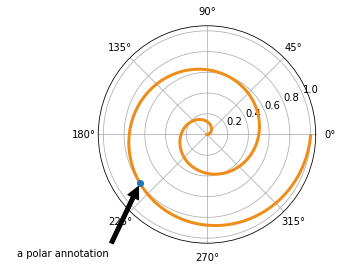

In [4]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, polar=True)
r = np.arange(0,1,0.001)
theta = 2*2*np.pi*r
line, = ax.plot(theta, r, color='#ee8d18', lw=3)

ind = 800
thisr, thistheta = r[ind], theta[ind]
ax.plot([thistheta], [thisr], 'o')
ax.annotate('a polar annotation',
            xy=(thistheta, thisr),  # theta, radius
            xytext=(0.05, 0.05),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left',
            verticalalignment='bottom',
            )
plt.show()

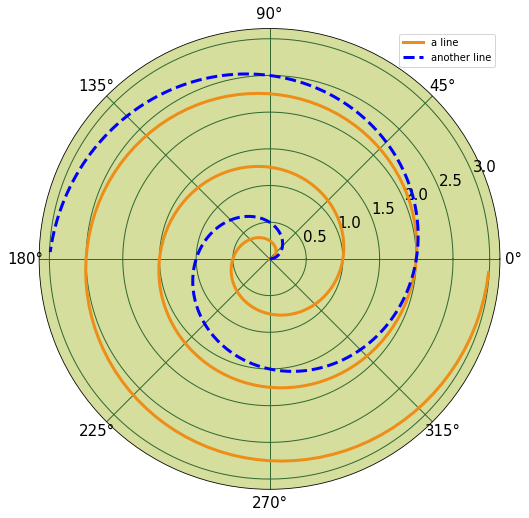

In [5]:
import numpy as np
from matplotlib.pyplot import figure, show, rc

# radar green, solid grid lines
rc('grid', color='#316931', linewidth=1, linestyle='-')
rc('xtick', labelsize=15)
rc('ytick', labelsize=15)

# force square figure and square axes looks better for polar, IMO
fig = figure(figsize=(8, 8))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8],
                  projection='polar', facecolor='#d5de9c')

r = np.arange(0, 3.0, 0.01)
theta = 2*np.pi*r
ax.plot(theta, r, color='#ee8d18', lw=3, label='a line')
ax.plot(0.5*theta, r, color='blue', ls='--', lw=3, label='another line')
ax.legend()

show()

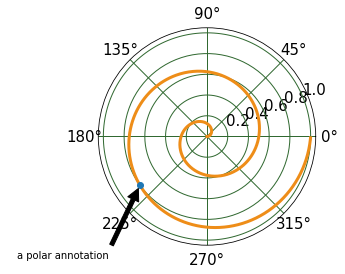

In [6]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, polar=True)
r = np.arange(0,1,0.001)
theta = 2*2*np.pi*r
line, = ax.plot(theta, r, color='#ee8d18', lw=3)

ind = 800
thisr, thistheta = r[ind], theta[ind]
ax.plot([thistheta], [thisr], 'o')
ax.annotate('a polar annotation',
            xy=(thistheta, thisr),  # theta, radius
            xytext=(0.05, 0.05),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left',
            verticalalignment='bottom',
            )
plt.show()

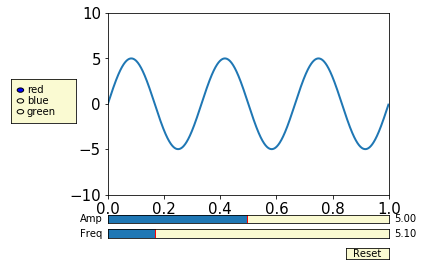

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)
t = np.arange(0.0, 1.0, 0.001)
a0 = 5
f0 = 3
delta_f = 5.0
s = a0 * np.sin(2 * np.pi * f0 * t)
l, = plt.plot(t, s, lw=2)
plt.axis([0, 1, -10, 10])

axcolor = 'lightgoldenrodyellow'
axfreq = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
axamp = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)

sfreq = Slider(axfreq, 'Freq', 0.1, 30.0, valinit=f0, valstep=delta_f)
samp = Slider(axamp, 'Amp', 0.1, 10.0, valinit=a0)


def update(val):
    amp = samp.val
    freq = sfreq.val
    l.set_ydata(amp*np.sin(2*np.pi*freq*t))
    fig.canvas.draw_idle()


sfreq.on_changed(update)
samp.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')


def reset(event):
    sfreq.reset()
    samp.reset()
button.on_clicked(reset)

rax = plt.axes([0.025, 0.5, 0.15, 0.15], facecolor=axcolor)
radio = RadioButtons(rax, ('red', 'blue', 'green'), active=0)


def colorfunc(label):
    l.set_color(label)
    fig.canvas.draw_idle()
radio.on_clicked(colorfunc)

plt.show()

In [8]:
from ipywidgets import *
def update(w=0,h=0):
    print(h+w)

interact(update, w= widgets.IntSlider(value=1, min=0, max=7, step=1) , 
                 h= widgets.IntSlider(value=1, min=0, max=7, step=1) );

interactive(children=(IntSlider(value=1, description='w', max=7), IntSlider(value=1, description='h', max=7), …

In [9]:
def f(x):
    return x

In [10]:
interact(f, x=[('one', 10), ('two', 20)]);

interactive(children=(Dropdown(description='x', options=(('one', 10), ('two', 20)), value=10), Output()), _dom…

In [11]:
def slow_function(i):
    print(int(i),list(x for x in range(int(i)) if
                str(x)==str(x)[::-1] and
                str(x**2)==str(x**2)[::-1]))
    return

In [12]:
%%time
slow_function(1e6)

1000000 [0, 1, 2, 3, 11, 22, 101, 111, 121, 202, 212, 1001, 1111, 2002, 10001, 10101, 10201, 11011, 11111, 11211, 20002, 20102, 100001, 101101, 110011, 111111, 200002]
Wall time: 444 ms


In [13]:
from ipywidgets import FloatSlider
interact(slow_function,i=FloatSlider(min=1e5, max=1e7, step=1e5));

interactive(children=(FloatSlider(value=100000.0, description='i', max=10000000.0, min=100000.0, step=100000.0…

In [14]:
a = widgets.IntSlider()
b = widgets.IntSlider()
c = widgets.IntSlider()
ui = widgets.HBox([a, b, c])
def f(a, b, c):
    print((a, b, c))

out = widgets.interactive_output(f, {'a': a, 'b': b, 'c': c})

display(ui, out)

Output()

In [15]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def f(m, b):
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, m * x + b)
    plt.ylim(-5, 5)
    plt.show()

interactive_plot = interactive(f, m=(-2.0, 2.0), b=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

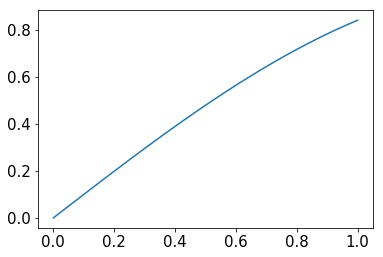

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import EllipseSelector

def onselect(eclick, erelease):
    "eclick and erelease are matplotlib events at press and release."
    print('startposition: (%f, %f)' % (eclick.xdata, eclick.ydata))
    print('endposition  : (%f, %f)' % (erelease.xdata, erelease.ydata))
    print('used button  : ', eclick.button)

def toggle_selector(event):
    print(' Key pressed.')
    if event.key in ['Q', 'q'] and toggle_selector.ES.active:
        print('EllipseSelector deactivated.')
        toggle_selector.RS.set_active(False)
    if event.key in ['A', 'a'] and not toggle_selector.ES.active:
        print('EllipseSelector activated.')
        toggle_selector.ES.set_active(True)

x = np.arange(100.) / 99
y = np.sin(x)
fig, ax = plt.subplots()
ax.plot(x, y)

toggle_selector.ES = EllipseSelector(ax, onselect, drawtype='line')
fig.canvas.mpl_connect('key_press_event', toggle_selector)
plt.show()

Text(0.5,0,'n')

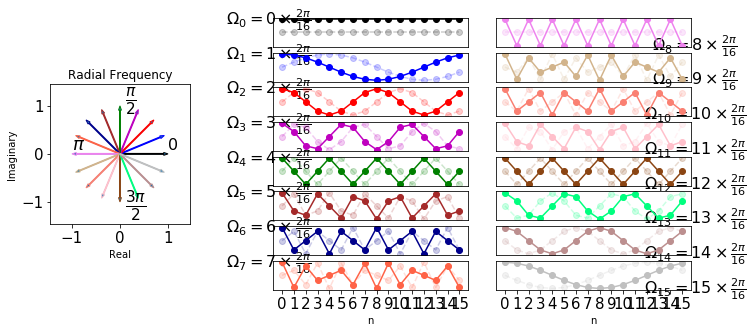

In [17]:
# must start notebook with --pylab flag

from __future__ import  division
from matplotlib.patches import FancyArrow
import mpl_toolkits.mplot3d.art3d as art3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.gridspec as gridspec

import numpy as np
import math
import matplotlib as mp
import matplotlib.pyplot as plt



def dftmatrix(Nfft=32,N=None):
    'construct DFT matrix'
    k= np.arange(Nfft)
    if N is None: N = Nfft
    n = np.arange(N)
    U = np.matrix(np.exp(1j* 2*np.pi/Nfft *k*n[:,None])) # use numpy broadcasting to create matrix
    return U/np.sqrt(Nfft)

Nfft=16
v = np.ones((16,1))
U = dftmatrix(Nfft=Nfft,N=16)

# --- 
# hardcoded constants to format complicated figure

gs = gridspec.GridSpec(8,12)
gs.update( wspace=1, left=0.01)


import matplotlib as mp
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(10,5))
ax0 = plt.subplot(gs[:,:3])
fig.add_subplot(ax0)

ax0.set_aspect(1)

a=2*np.pi/Nfft*np.arange(Nfft)
# a=[2*np.pi/Nfft*np.arange(Nfft)]


colors = ['k','b','r','m','g','Brown','DarkBlue','Tomato','Violet', 'Tan','Salmon','Pink',
          'SaddleBrown', 'SpringGreen', 'RosyBrown','Silver',]
for j,i in enumerate(a):
  ax0.add_patch( FancyArrow(0,0,np.cos(i),np.sin(i),width=0.02,
                            length_includes_head=True,edgecolor=colors[j]))

ax0.text(1,0.1,'0',fontsize=16)
ax0.text(0.1,1,r'$\frac{\pi}{2}$',fontsize=22)
ax0.text(-1,0.1,r'$\pi$',fontsize=18)
ax0.text(0.1,-1.2,r'$\frac{3\pi}{2}$',fontsize=22)
ax0.axis(np.array([-1,1,-1,1])*1.45)
ax0.set_title('Radial Frequency')
ax0.set_xlabel('Real')
ax0.set_ylabel('Imaginary')

# plots in the middle column
for i in range(8):
  ax=plt.subplot(gs[i,4:8])
  ax.set_xticks([]);  ax.set_yticks([])
  ax.set_ylabel(r'$\Omega_{%d}=%d\times\frac{2\pi}{16}$'%(i,i),fontsize=16,
                rotation='horizontal')
  ax.plot(U.real[:,i],'-o',color=colors[i])
  ax.plot(U.imag[:,i],'--o',color=colors[i],alpha=0.2)
  ax.axis(ymax=4/Nfft*1.1,ymin=-4/Nfft*1.1)
ax.set_xticks(np.arange(16))
ax.set_xlabel('n')

# plots in the far right column
for i in range(8):
  ax=plt.subplot(gs[i,8:])
  ax.set_xticks([]);  ax.set_yticks([])
  ax.set_ylabel(r'$\Omega_{%d}=%d\times\frac{2\pi}{16}$'%(i+8,i+8),fontsize=16,
                rotation='horizontal')
  ax.plot(U.real[:,i+8],'-o',color=colors[i+8])
  ax.plot(U.imag[:,i+8],'--o',color=colors[i+8],alpha=0.2)
  ax.axis(ymax=4/Nfft*1.1,ymin=-4/Nfft*1.1)    
  ax.yaxis.set_label_position('right')
ax.set_xticks(np.arange(16))
ax.set_xlabel('n')
# fig.savefig('figure_00@.png', bbox_inches='tight', dpi=300)

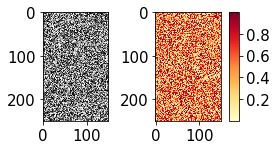

In [18]:
import matplotlib as mp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Random test data:
ROI = np.random.rand(250, 150)
z = np.random.rand(250, 150)

fig = plt.figure(num=2,figsize=(4,2))
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1.08])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

ax0.imshow(ROI,'gray')

map1 = ax1.imshow(z,cmap=plt.cm.YlOrRd)
divider1 = make_axes_locatable(ax1)
cax1 = divider1.append_axes("right", size="15%", pad="13%")
cbar1 = plt.colorbar(map1, cax=cax1)

plt.show()


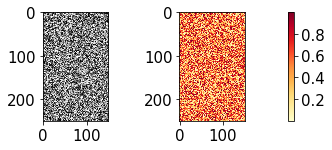

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Random test data:
ROI = np.random.rand(250, 150)
z = np.random.rand(250, 150)

fig = plt.figure(num=2,figsize=(5,2))
gs = gridspec.GridSpec(1, 3, width_ratios=[1,1,0.05])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
cax1 = plt.subplot(gs[2])

ax0.imshow(ROI,'gray')
map1 = ax1.imshow(z,cmap=plt.cm.YlOrRd)
cbar1 = plt.colorbar(map1, cax=cax1)

plt.show()

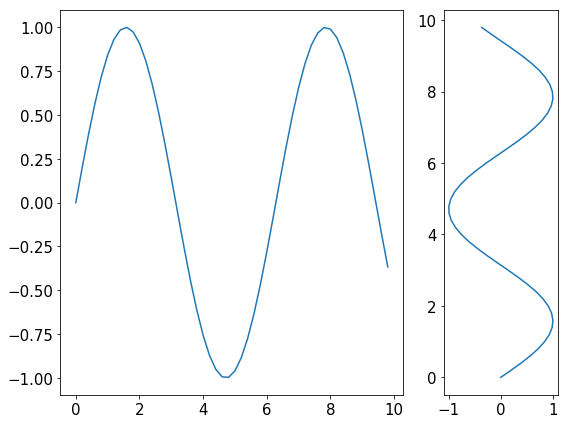

In [20]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import gridspec

# generate some data
x = np.arange(0, 10, 0.2)
y = np.sin(x)

# plot it
fig = plt.figure(figsize=(8, 6)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1]) 
ax0 = plt.subplot(gs[0])
ax0.plot(x, y)
ax1 = plt.subplot(gs[1])
ax1.plot(y, x)

plt.tight_layout()
plt.savefig('grid_figure.pdf')

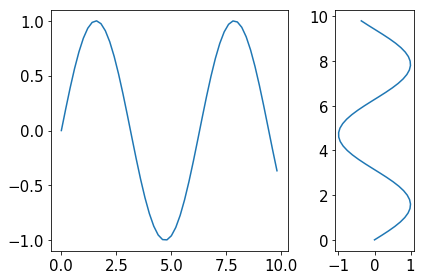

In [21]:
import numpy as np
import matplotlib.pyplot as plt 

# generate some data
x = np.arange(0, 10, 0.2)
y = np.sin(x)

# plot it
f, (a0, a1) = plt.subplots(1,2, gridspec_kw = {'width_ratios':[3, 1]})
a0.plot(x,y)
a1.plot(y,x)

f.tight_layout()
f.savefig('grid_figure.pdf')

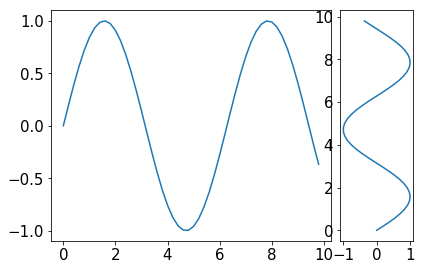

In [22]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(0, 10, 0.2)
y = np.sin(x)

# definitions for the axes
left, width = 0.07, 0.65
bottom, height = 0.1, .8
bottom_h = left_h = left+width+0.02

rect_cones = [left, bottom, width, height]
rect_box = [left_h, bottom, 0.17, height]

fig = plt.figure()

cones = plt.axes(rect_cones)
box = plt.axes(rect_box)

cones.plot(x, y)

box.plot(y, x)

plt.show()

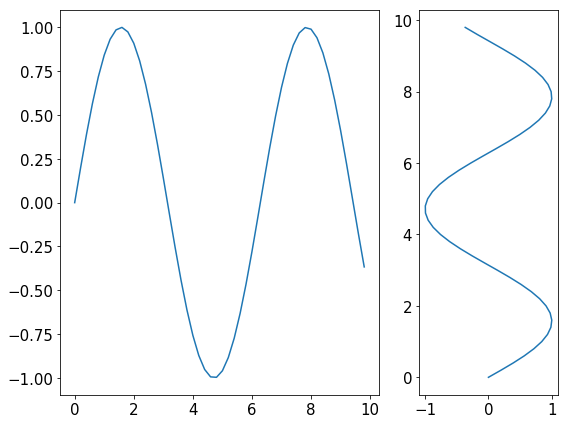

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# generate some data
x = np.arange(0, 10, 0.2)
y = np.sin(x)

# plot it
fig = plt.figure(figsize=(8, 6))
ax0 = plt.subplot2grid((1, 3), (0, 0), colspan=2)
ax0.plot(x, y)
ax1 = plt.subplot2grid((1, 3), (0, 2))
ax1.plot(y, x)

plt.tight_layout()
plt.savefig('grid_figure.pdf')

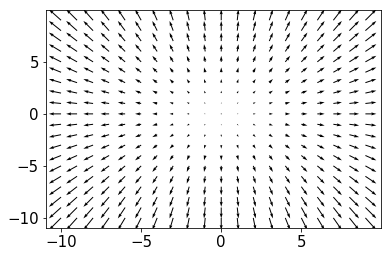

In [24]:
'''
==================================================
A simple example of a quiver plot with a quiverkey
==================================================
'''
import matplotlib.pyplot as plt
import numpy as np

X = np.arange(-10, 10, 1)
Y = np.arange(-10, 10, 1)
U, V = np.meshgrid(X, Y)

fig, ax = plt.subplots()
q = ax.quiver(X, Y, U, V)
ax.quiverkey(q, X=0.3, Y=1.1, U=10,
             label='Quiver key, length = 10', labelpos='E')

plt.show()

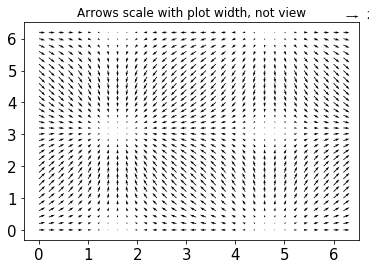

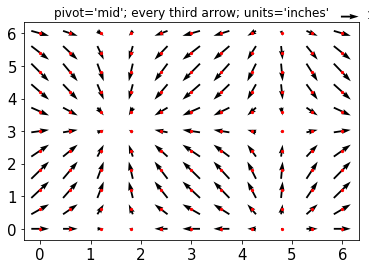

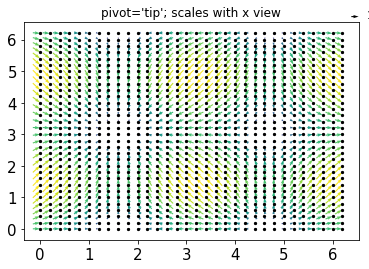

In [25]:
'''
========================================================
Demonstration of advanced quiver and quiverkey functions
========================================================

Known problem: the plot autoscaling does not take into account
the arrows, so those on the boundaries are often out of the picture.
This is *not* an easy problem to solve in a perfectly general way.
The workaround is to manually expand the axes.
'''
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma

X, Y = np.meshgrid(np.arange(0, 2 * np.pi, .2), np.arange(0, 2 * np.pi, .2))
U = np.cos(X)
V = np.sin(Y)

plt.figure()
plt.title('Arrows scale with plot width, not view')
Q = plt.quiver(X, Y, U, V, units='width')
qk = plt.quiverkey(Q, 0.9, 0.9, 2, r'$2 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')

plt.figure()
plt.title("pivot='mid'; every third arrow; units='inches'")
Q = plt.quiver(X[::3, ::3], Y[::3, ::3], U[::3, ::3], V[::3, ::3],
               pivot='mid', units='inches')
qk = plt.quiverkey(Q, 0.9, 0.9, 1, r'$1 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')
plt.scatter(X[::3, ::3], Y[::3, ::3], color='r', s=5)

plt.figure()
plt.title("pivot='tip'; scales with x view")
M = np.hypot(U, V)
Q = plt.quiver(X, Y, U, V, M, units='x', pivot='tip', width=0.022,
               scale=1 / 0.15)
qk = plt.quiverkey(Q, 0.9, 0.9, 1, r'$1 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')
plt.scatter(X, Y, color='k', s=5)

plt.show()

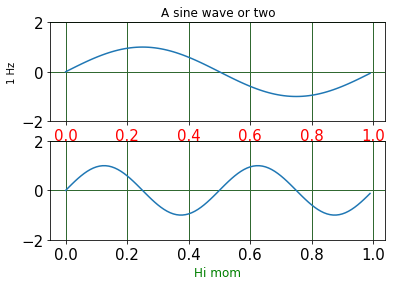

In [26]:
"""
Some people prefer to write more pythonic, object-oriented code
rather than use the pyplot interface to matplotlib.  This example shows
you how.

Unless you are an application developer, I recommend using part of the
pyplot interface, particularly the figure, close, subplot, axes, and
show commands.  These hide a lot of complexity from you that you don't
need to see in normal figure creation, like instantiating DPI
instances, managing the bounding boxes of the figure elements,
creating and realizing GUI windows and embedding figures in them.


If you are an application developer and want to embed matplotlib in
your application, follow the lead of examples/embedding_in_wx.py,
examples/embedding_in_gtk.py or examples/embedding_in_tk.py.  In this
case you will want to control the creation of all your figures,
embedding them in application windows, etc.

If you are a web application developer, you may want to use the
example in webapp_demo.py, which shows how to use the backend agg
figure canvas directly, with none of the globals (current figure,
current axes) that are present in the pyplot interface.  Note that
there is no reason why the pyplot interface won't work for web
application developers, however.

If you see an example in the examples dir written in pyplot interface,
and you want to emulate that using the true python method calls, there
is an easy mapping.  Many of those examples use 'set' to control
figure properties.  Here's how to map those commands onto instance
methods

The syntax of set is

  plt.setp(object or sequence, somestring, attribute)

if called with an object, set calls

  object.set_somestring(attribute)

if called with a sequence, set does

  for object in sequence:
       object.set_somestring(attribute)

So for your example, if a is your axes object, you can do

  a.set_xticklabels([])
  a.set_yticklabels([])
  a.set_xticks([])
  a.set_yticks([])
"""


from matplotlib.pyplot import figure, show
from numpy import arange, sin, pi

t = arange(0.0, 1.0, 0.01)

fig = figure(1)

ax1 = fig.add_subplot(211)
ax1.plot(t, sin(2*pi*t))
ax1.grid(True)
ax1.set_ylim((-2, 2))
ax1.set_ylabel('1 Hz')
ax1.set_title('A sine wave or two')

for label in ax1.get_xticklabels():
    label.set_color('r')


ax2 = fig.add_subplot(212)
ax2.plot(t, sin(2*2*pi*t))
ax2.grid(True)
ax2.set_ylim((-2, 2))
l = ax2.set_xlabel('Hi mom')
l.set_color('g')
l.set_fontsize('large')

show()

C:\Users\Alex\Anaconda3\lib\site-packages\mkl_fft\_numpy_fft.py:158: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.fft(a, n, axis)


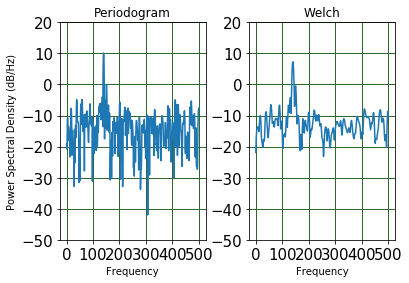

In [27]:
"""This is a ported version of a MATLAB example from the signal
processing toolbox that showed some difference at one time between
Matplotlib's and MATLAB's scaling of the PSD.

"""

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

prng = np.random.RandomState(123456)  # to ensure reproducibility

fs = 1000
t = np.linspace(0, 0.3, 301)
A = np.array([2, 8]).reshape(-1, 1)
f = np.array([150, 140]).reshape(-1, 1)
xn = (A * np.sin(2 * np.pi * f * t)).sum(axis=0) + 5 * prng.randn(*t.shape)

fig, (ax0, ax1) = plt.subplots(ncols=2)

fig.subplots_adjust(hspace=0.45, wspace=0.3)
yticks = np.arange(-50, 30, 10)
yrange = (yticks[0], yticks[-1])
xticks = np.arange(0, 550, 100)

ax0.psd(xn, NFFT=301, Fs=fs, window=mlab.window_none, pad_to=1024,
        scale_by_freq=True)
ax0.set_title('Periodogram')
ax0.set_yticks(yticks)
ax0.set_xticks(xticks)
ax0.grid(True)
ax0.set_ylim(yrange)

ax1.psd(xn, NFFT=150, Fs=fs, window=mlab.window_none, pad_to=512, noverlap=75,
        scale_by_freq=True)
ax1.set_title('Welch')
ax1.set_xticks(xticks)
ax1.set_yticks(yticks)
ax1.set_ylabel('')  # overwrite the y-label added by `psd`
ax1.grid(True)
ax1.set_ylim(yrange)

plt.show()

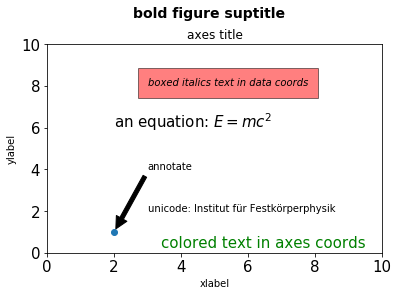

In [28]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt

fig = plt.figure()
fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('axes title')

ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

ax.text(3, 8, 'boxed italics text in data coords', style='italic',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

ax.text(2, 6, r'an equation: $E=mc^2$', fontsize=15)

ax.text(3, 2, u'unicode: Institut f\374r Festk\366rperphysik')

ax.text(0.95, 0.01, 'colored text in axes coords',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=15)


ax.plot([2], [1], 'o')
ax.annotate('annotate', xy=(2, 1), xytext=(3, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.axis([0, 10, 0, 10])

plt.show()

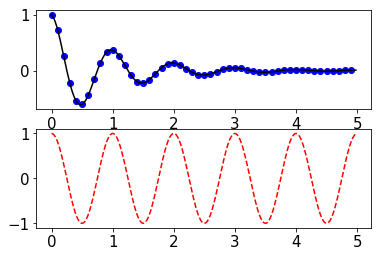

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1)
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

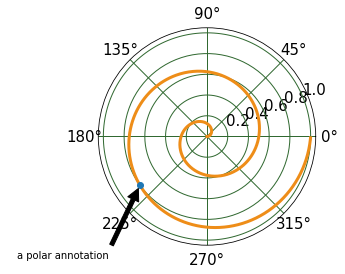

In [30]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, polar=True)
r = np.arange(0,1,0.001)
theta = 2*2*np.pi*r
line, = ax.plot(theta, r, color='#ee8d18', lw=3)

ind = 800
thisr, thistheta = r[ind], theta[ind]
ax.plot([thistheta], [thisr], 'o')
ax.annotate('a polar annotation',
            xy=(thistheta, thisr),  # theta, radius
            xytext=(0.05, 0.05),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left',
            verticalalignment='bottom',
            )
plt.show()

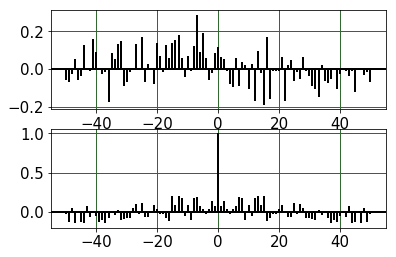

In [31]:
import matplotlib.pyplot as plt
import numpy as np


np.random.seed(0)

x, y = np.random.randn(2, 100)
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.xcorr(x, y, usevlines=True, maxlags=50, normed=True, lw=2)
ax1.grid(True)
ax1.axhline(0, color='black', lw=2)

ax2 = fig.add_subplot(212, sharex=ax1)
ax2.acorr(x, usevlines=True, normed=True, maxlags=50, lw=2)
ax2.grid(True)
ax2.axhline(0, color='black', lw=2)

plt.show()

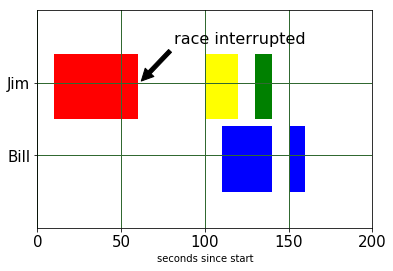

In [32]:
"""
Make a "broken" horizontal bar plot, i.e., one with gaps
"""
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.broken_barh([(110, 30), (150, 10)], (10, 9), facecolors='blue')
ax.broken_barh([(10, 50), (100, 20), (130, 10)], (20, 9),
               facecolors=('red', 'yellow', 'green'))
ax.set_ylim(5, 35)
ax.set_xlim(0, 200)
ax.set_xlabel('seconds since start')
ax.set_yticks([15, 25])
ax.set_yticklabels(['Bill', 'Jim'])
ax.grid(True)
ax.annotate('race interrupted', (61, 25),
            xytext=(0.8, 0.9), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=16,
            horizontalalignment='right', verticalalignment='top')

plt.show()

C:\Users\Alex\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: The bivariate_normal function was deprecated in version 2.2.
C:\Users\Alex\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: MatplotlibDeprecationWarning: The bivariate_normal function was deprecated in version 2.2.


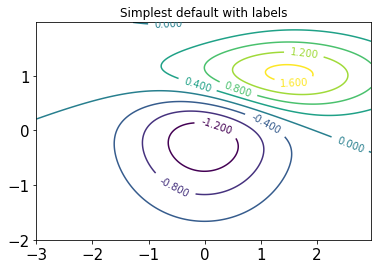

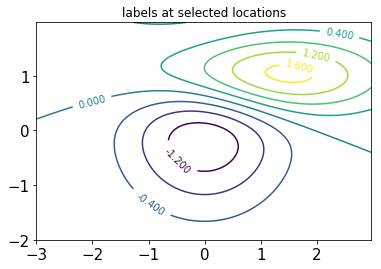

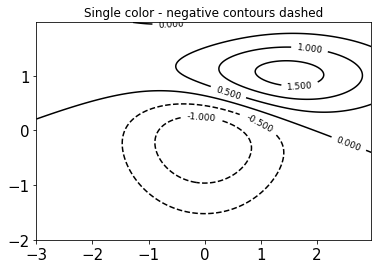

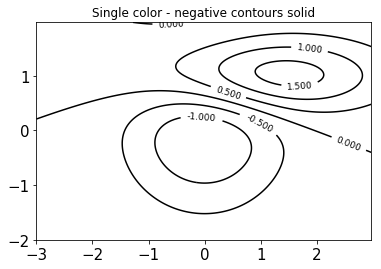

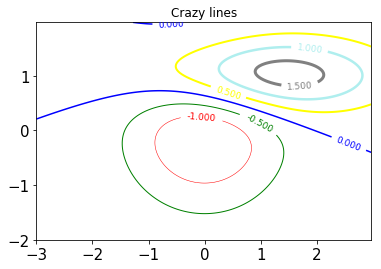

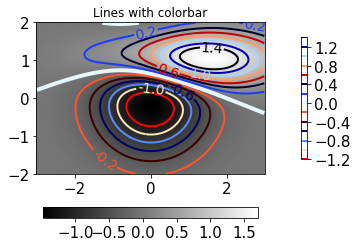

In [33]:
"""
Illustrate simple contour plotting, contours on an image with
a colorbar for the contours, and labelled contours.

See also contour_image.py.
"""
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = mlab.bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
Z2 = mlab.bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
# difference of Gaussians
Z = 10.0 * (Z2 - Z1)


# Create a simple contour plot with labels using default colors.  The
# inline argument to clabel will control whether the labels are draw
# over the line segments of the contour, removing the lines beneath
# the label
plt.figure()
CS = plt.contour(X, Y, Z)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Simplest default with labels')


# contour labels can be placed manually by providing list of positions
# (in data coordinate). See ginput_manual_clabel.py for interactive
# placement.
plt.figure()
CS = plt.contour(X, Y, Z)
manual_locations = [(-1, -1.4), (-0.62, -0.7), (-2, 0.5), (1.7, 1.2), (2.0, 1.4), (2.4, 1.7)]
plt.clabel(CS, inline=1, fontsize=10, manual=manual_locations)
plt.title('labels at selected locations')


# You can force all the contours to be the same color.
plt.figure()
CS = plt.contour(X, Y, Z, 6,
                 colors='k',  # negative contours will be dashed by default
                 )
plt.clabel(CS, fontsize=9, inline=1)
plt.title('Single color - negative contours dashed')

# You can set negative contours to be solid instead of dashed:
matplotlib.rcParams['contour.negative_linestyle'] = 'solid'
plt.figure()
CS = plt.contour(X, Y, Z, 6,
                 colors='k',  # negative contours will be dashed by default
                 )
plt.clabel(CS, fontsize=9, inline=1)
plt.title('Single color - negative contours solid')


# And you can manually specify the colors of the contour
plt.figure()
CS = plt.contour(X, Y, Z, 6,
                 linewidths=np.arange(.5, 4, .5),
                 colors=('r', 'green', 'blue', (1, 1, 0), '#afeeee', '0.5')
                 )
plt.clabel(CS, fontsize=9, inline=1)
plt.title('Crazy lines')


# Or you can use a colormap to specify the colors; the default
# colormap will be used for the contour lines
plt.figure()
im = plt.imshow(Z, interpolation='bilinear', origin='lower',
                cmap=cm.gray, extent=(-3, 3, -2, 2))
levels = np.arange(-1.2, 1.6, 0.2)
CS = plt.contour(Z, levels,
                 origin='lower',
                 linewidths=2,
                 extent=(-3, 3, -2, 2))

# Thicken the zero contour.
zc = CS.collections[6]
plt.setp(zc, linewidth=4)

plt.clabel(CS, levels[1::2],  # label every second level
           inline=1,
           fmt='%1.1f',
           fontsize=14)

# make a colorbar for the contour lines
CB = plt.colorbar(CS, shrink=0.8, extend='both')

plt.title('Lines with colorbar')
#plt.hot()  # Now change the colormap for the contour lines and colorbar
plt.flag()

# We can still add a colorbar for the image, too.
CBI = plt.colorbar(im, orientation='horizontal', shrink=0.8)

# This makes the original colorbar look a bit out of place,
# so let's improve its position.

l, b, w, h = plt.gca().get_position().bounds
ll, bb, ww, hh = CB.ax.get_position().bounds
CB.ax.set_position([ll, b + 0.1*h, ww, h*0.8])


plt.show()

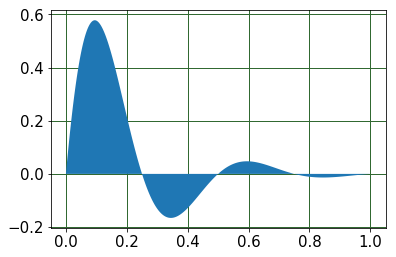

In [34]:
"""
==================
A simple Fill plot
==================

This example showcases the most basic fill plot a user can do with matplotlib.
"""
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 1, 500)
y = np.sin(4 * np.pi * x) * np.exp(-5 * x)

fig, ax = plt.subplots()

ax.fill(x, y, zorder=10)
ax.grid(True, zorder=5)
plt.show()

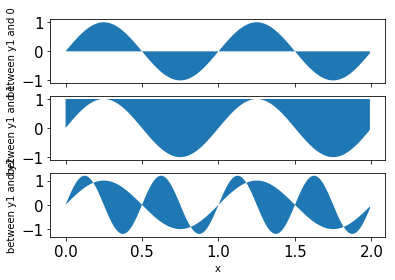

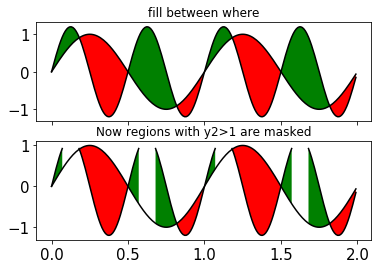

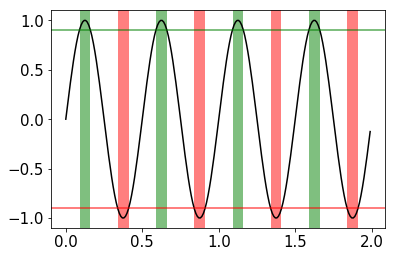

In [35]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0.0, 2, 0.01)
y1 = np.sin(2*np.pi*x)
y2 = 1.2*np.sin(4*np.pi*x)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)

ax1.fill_between(x, 0, y1)
ax1.set_ylabel('between y1 and 0')

ax2.fill_between(x, y1, 1)
ax2.set_ylabel('between y1 and 1')

ax3.fill_between(x, y1, y2)
ax3.set_ylabel('between y1 and y2')
ax3.set_xlabel('x')

# now fill between y1 and y2 where a logical condition is met.  Note
# this is different than calling
#   fill_between(x[where], y1[where],y2[where]
# because of edge effects over multiple contiguous regions.
fig, (ax, ax1) = plt.subplots(2, 1, sharex=True)
ax.plot(x, y1, x, y2, color='black')
ax.fill_between(x, y1, y2, where=y2 >= y1, facecolor='green', interpolate=True)
ax.fill_between(x, y1, y2, where=y2 <= y1, facecolor='red', interpolate=True)
ax.set_title('fill between where')

# Test support for masked arrays.
y2 = np.ma.masked_greater(y2, 1.0)
ax1.plot(x, y1, x, y2, color='black')
ax1.fill_between(x, y1, y2, where=y2 >= y1, facecolor='green', interpolate=True)
ax1.fill_between(x, y1, y2, where=y2 <= y1, facecolor='red', interpolate=True)
ax1.set_title('Now regions with y2>1 are masked')

# This example illustrates a problem; because of the data
# gridding, there are undesired unfilled triangles at the crossover
# points.  A brute-force solution would be to interpolate all
# arrays to a very fine grid before plotting.

# show how to use transforms to create axes spans where a certain condition is satisfied
fig, ax = plt.subplots()
y = np.sin(4*np.pi*x)
ax.plot(x, y, color='black')

# use the data coordinates for the x-axis and the axes coordinates for the y-axis
import matplotlib.transforms as mtransforms
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
theta = 0.9
ax.axhline(theta, color='green', lw=2, alpha=0.5)
ax.axhline(-theta, color='red', lw=2, alpha=0.5)
ax.fill_between(x, 0, 1, where=y > theta, facecolor='green', alpha=0.5, transform=trans)
ax.fill_between(x, 0, 1, where=y < -theta, facecolor='red', alpha=0.5, transform=trans)


plt.show()

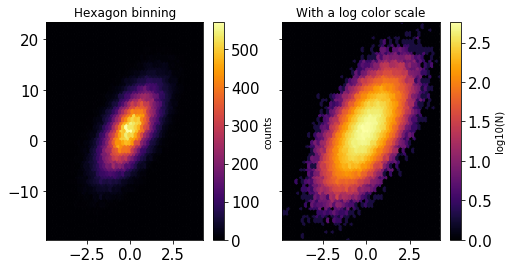

In [36]:
"""
hexbin is an axes method or pyplot function that is essentially
a pcolor of a 2-D histogram with hexagonal cells.  It can be
much more informative than a scatter plot; in the first subplot
below, try substituting 'scatter' for 'hexbin'.
"""

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
n = 100000
x = np.random.standard_normal(n)
y = 2.0 + 3.0 * x + 4.0 * np.random.standard_normal(n)
xmin = x.min()
xmax = x.max()
ymin = y.min()
ymax = y.max()

fig, axs = plt.subplots(ncols=2, sharey=True, figsize=(7, 4))
fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
ax = axs[0]
hb = ax.hexbin(x, y, gridsize=50, cmap='inferno')
ax.axis([xmin, xmax, ymin, ymax])
ax.set_title("Hexagon binning")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('counts')

ax = axs[1]
hb = ax.hexbin(x, y, gridsize=50, bins='log', cmap='inferno')
ax.axis([xmin, xmax, ymin, ymax])
ax.set_title("With a log color scale")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('log10(N)')

plt.show()

C:\Users\Alex\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: The bivariate_normal function was deprecated in version 2.2.
  if __name__ == '__main__':
C:\Users\Alex\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: The bivariate_normal function was deprecated in version 2.2.
  # Remove the CWD from sys.path while we load stuff.


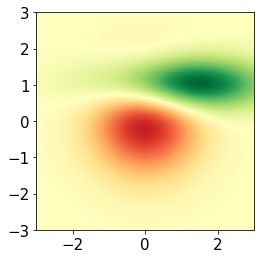

In [37]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

delta = 0.025
x = y = np.arange(-3.0, 3.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = mlab.bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
Z2 = mlab.bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
Z = Z2 - Z1  # difference of Gaussians

im = plt.imshow(Z, interpolation='bilinear', cmap=cm.RdYlGn,
                origin='lower', extent=[-3, 3, -3, 3],
                vmax=abs(Z).max(), vmin=-abs(Z).max())

plt.show()

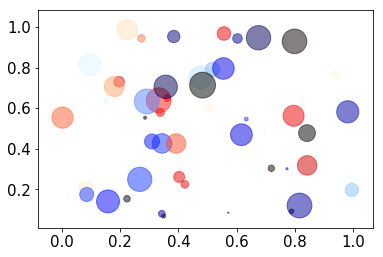

In [38]:
"""
Simple demo of a scatter plot.
"""
import numpy as np
import matplotlib.pyplot as plt


N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

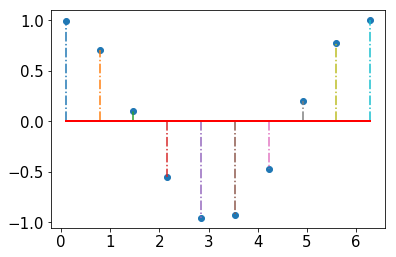

In [39]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0.1, 2*np.pi, 10)
markerline, stemlines, baseline = plt.stem(x, np.cos(x), '-.')
plt.setp(baseline, 'color', 'r', 'linewidth', 2)

plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

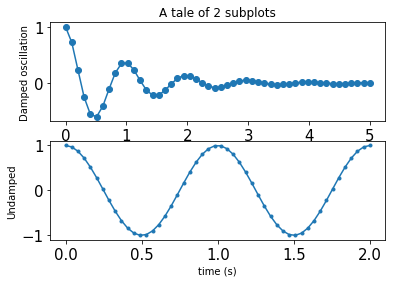

In [40]:
"""
Simple demo with multiple subplots.
"""
import numpy as np
import matplotlib.pyplot as plt


x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'o-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(2, 1, 2)
plt.plot(x2, y2, '.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.show

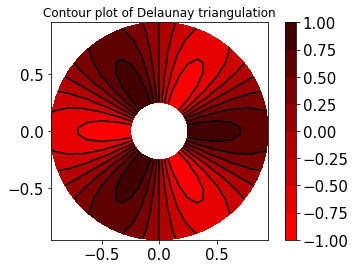

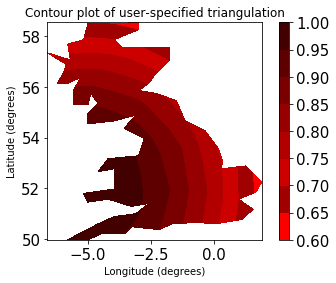

In [41]:
"""
Contour plots of unstructured triangular grids.
"""
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
import math

# Creating a Triangulation without specifying the triangles results in the
# Delaunay triangulation of the points.

# First create the x and y coordinates of the points.
n_angles = 48
n_radii = 8
min_radius = 0.25
radii = np.linspace(min_radius, 0.95, n_radii)

angles = np.linspace(0, 2*math.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
angles[:, 1::2] += math.pi/n_angles

x = (radii*np.cos(angles)).flatten()
y = (radii*np.sin(angles)).flatten()
z = (np.cos(radii)*np.cos(angles*3.0)).flatten()

# Create the Triangulation; no triangles so Delaunay triangulation created.
triang = tri.Triangulation(x, y)

# Mask off unwanted triangles.
xmid = x[triang.triangles].mean(axis=1)
ymid = y[triang.triangles].mean(axis=1)
mask = np.where(xmid*xmid + ymid*ymid < min_radius*min_radius, 1, 0)
triang.set_mask(mask)

# pcolor plot.
plt.figure()
plt.gca().set_aspect('equal')
plt.tricontourf(triang, z)
plt.colorbar()
plt.tricontour(triang, z, colors='k')
plt.title('Contour plot of Delaunay triangulation')

# You can specify your own triangulation rather than perform a Delaunay
# triangulation of the points, where each triangle is given by the indices of
# the three points that make up the triangle, ordered in either a clockwise or
# anticlockwise manner.

xy = np.asarray([
    [-0.101, 0.872], [-0.080, 0.883], [-0.069, 0.888], [-0.054, 0.890],
    [-0.045, 0.897], [-0.057, 0.895], [-0.073, 0.900], [-0.087, 0.898],
    [-0.090, 0.904], [-0.069, 0.907], [-0.069, 0.921], [-0.080, 0.919],
    [-0.073, 0.928], [-0.052, 0.930], [-0.048, 0.942], [-0.062, 0.949],
    [-0.054, 0.958], [-0.069, 0.954], [-0.087, 0.952], [-0.087, 0.959],
    [-0.080, 0.966], [-0.085, 0.973], [-0.087, 0.965], [-0.097, 0.965],
    [-0.097, 0.975], [-0.092, 0.984], [-0.101, 0.980], [-0.108, 0.980],
    [-0.104, 0.987], [-0.102, 0.993], [-0.115, 1.001], [-0.099, 0.996],
    [-0.101, 1.007], [-0.090, 1.010], [-0.087, 1.021], [-0.069, 1.021],
    [-0.052, 1.022], [-0.052, 1.017], [-0.069, 1.010], [-0.064, 1.005],
    [-0.048, 1.005], [-0.031, 1.005], [-0.031, 0.996], [-0.040, 0.987],
    [-0.045, 0.980], [-0.052, 0.975], [-0.040, 0.973], [-0.026, 0.968],
    [-0.020, 0.954], [-0.006, 0.947], [ 0.003, 0.935], [ 0.006, 0.926],
    [ 0.005, 0.921], [ 0.022, 0.923], [ 0.033, 0.912], [ 0.029, 0.905],
    [ 0.017, 0.900], [ 0.012, 0.895], [ 0.027, 0.893], [ 0.019, 0.886],
    [ 0.001, 0.883], [-0.012, 0.884], [-0.029, 0.883], [-0.038, 0.879],
    [-0.057, 0.881], [-0.062, 0.876], [-0.078, 0.876], [-0.087, 0.872],
    [-0.030, 0.907], [-0.007, 0.905], [-0.057, 0.916], [-0.025, 0.933],
    [-0.077, 0.990], [-0.059, 0.993]])
x = np.degrees(xy[:, 0])
y = np.degrees(xy[:, 1])
x0 = -5
y0 = 52
z = np.exp(-0.01*((x - x0)*(x - x0) + (y - y0)*(y - y0)))

triangles = np.asarray([
    [67, 66,  1], [65,  2, 66], [ 1, 66,  2], [64,  2, 65], [63,  3, 64],
    [60, 59, 57], [ 2, 64,  3], [ 3, 63,  4], [ 0, 67,  1], [62,  4, 63],
    [57, 59, 56], [59, 58, 56], [61, 60, 69], [57, 69, 60], [ 4, 62, 68],
    [ 6,  5,  9], [61, 68, 62], [69, 68, 61], [ 9,  5, 70], [ 6,  8,  7],
    [ 4, 70,  5], [ 8,  6,  9], [56, 69, 57], [69, 56, 52], [70, 10,  9],
    [54, 53, 55], [56, 55, 53], [68, 70,  4], [52, 56, 53], [11, 10, 12],
    [69, 71, 68], [68, 13, 70], [10, 70, 13], [51, 50, 52], [13, 68, 71],
    [52, 71, 69], [12, 10, 13], [71, 52, 50], [71, 14, 13], [50, 49, 71],
    [49, 48, 71], [14, 16, 15], [14, 71, 48], [17, 19, 18], [17, 20, 19],
    [48, 16, 14], [48, 47, 16], [47, 46, 16], [16, 46, 45], [23, 22, 24],
    [21, 24, 22], [17, 16, 45], [20, 17, 45], [21, 25, 24], [27, 26, 28],
    [20, 72, 21], [25, 21, 72], [45, 72, 20], [25, 28, 26], [44, 73, 45],
    [72, 45, 73], [28, 25, 29], [29, 25, 31], [43, 73, 44], [73, 43, 40],
    [72, 73, 39], [72, 31, 25], [42, 40, 43], [31, 30, 29], [39, 73, 40],
    [42, 41, 40], [72, 33, 31], [32, 31, 33], [39, 38, 72], [33, 72, 38],
    [33, 38, 34], [37, 35, 38], [34, 38, 35], [35, 37, 36]])

# Rather than create a Triangulation object, can simply pass x, y and triangles
# arrays to tripcolor directly.  It would be better to use a Triangulation
# object if the same triangulation was to be used more than once to save
# duplicated calculations.
plt.figure()
plt.gca().set_aspect('equal')
plt.tricontourf(x, y, triangles, z)
plt.colorbar()
plt.title('Contour plot of user-specified triangulation')
plt.xlabel('Longitude (degrees)')
plt.ylabel('Latitude (degrees)')

plt.show()

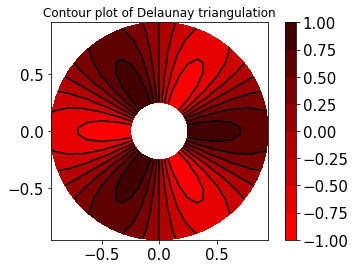

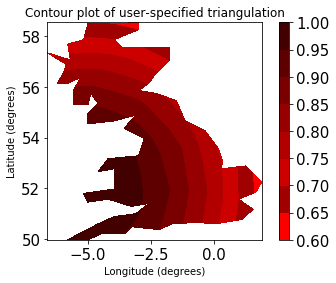

In [42]:
"""
Contour plots of unstructured triangular grids.
"""
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
import math

# Creating a Triangulation without specifying the triangles results in the
# Delaunay triangulation of the points.

# First create the x and y coordinates of the points.
n_angles = 48
n_radii = 8
min_radius = 0.25
radii = np.linspace(min_radius, 0.95, n_radii)

angles = np.linspace(0, 2*math.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
angles[:, 1::2] += math.pi/n_angles

x = (radii*np.cos(angles)).flatten()
y = (radii*np.sin(angles)).flatten()
z = (np.cos(radii)*np.cos(angles*3.0)).flatten()

# Create the Triangulation; no triangles so Delaunay triangulation created.
triang = tri.Triangulation(x, y)

# Mask off unwanted triangles.
xmid = x[triang.triangles].mean(axis=1)
ymid = y[triang.triangles].mean(axis=1)
mask = np.where(xmid*xmid + ymid*ymid < min_radius*min_radius, 1, 0)
triang.set_mask(mask)

# pcolor plot.
plt.figure()
plt.gca().set_aspect('equal')
plt.tricontourf(triang, z)
plt.colorbar()
plt.tricontour(triang, z, colors='k')
plt.title('Contour plot of Delaunay triangulation')

# You can specify your own triangulation rather than perform a Delaunay
# triangulation of the points, where each triangle is given by the indices of
# the three points that make up the triangle, ordered in either a clockwise or
# anticlockwise manner.

xy = np.asarray([
    [-0.101, 0.872], [-0.080, 0.883], [-0.069, 0.888], [-0.054, 0.890],
    [-0.045, 0.897], [-0.057, 0.895], [-0.073, 0.900], [-0.087, 0.898],
    [-0.090, 0.904], [-0.069, 0.907], [-0.069, 0.921], [-0.080, 0.919],
    [-0.073, 0.928], [-0.052, 0.930], [-0.048, 0.942], [-0.062, 0.949],
    [-0.054, 0.958], [-0.069, 0.954], [-0.087, 0.952], [-0.087, 0.959],
    [-0.080, 0.966], [-0.085, 0.973], [-0.087, 0.965], [-0.097, 0.965],
    [-0.097, 0.975], [-0.092, 0.984], [-0.101, 0.980], [-0.108, 0.980],
    [-0.104, 0.987], [-0.102, 0.993], [-0.115, 1.001], [-0.099, 0.996],
    [-0.101, 1.007], [-0.090, 1.010], [-0.087, 1.021], [-0.069, 1.021],
    [-0.052, 1.022], [-0.052, 1.017], [-0.069, 1.010], [-0.064, 1.005],
    [-0.048, 1.005], [-0.031, 1.005], [-0.031, 0.996], [-0.040, 0.987],
    [-0.045, 0.980], [-0.052, 0.975], [-0.040, 0.973], [-0.026, 0.968],
    [-0.020, 0.954], [-0.006, 0.947], [ 0.003, 0.935], [ 0.006, 0.926],
    [ 0.005, 0.921], [ 0.022, 0.923], [ 0.033, 0.912], [ 0.029, 0.905],
    [ 0.017, 0.900], [ 0.012, 0.895], [ 0.027, 0.893], [ 0.019, 0.886],
    [ 0.001, 0.883], [-0.012, 0.884], [-0.029, 0.883], [-0.038, 0.879],
    [-0.057, 0.881], [-0.062, 0.876], [-0.078, 0.876], [-0.087, 0.872],
    [-0.030, 0.907], [-0.007, 0.905], [-0.057, 0.916], [-0.025, 0.933],
    [-0.077, 0.990], [-0.059, 0.993]])
x = np.degrees(xy[:, 0])
y = np.degrees(xy[:, 1])
x0 = -5
y0 = 52
z = np.exp(-0.01*((x - x0)*(x - x0) + (y - y0)*(y - y0)))

triangles = np.asarray([
    [67, 66,  1], [65,  2, 66], [ 1, 66,  2], [64,  2, 65], [63,  3, 64],
    [60, 59, 57], [ 2, 64,  3], [ 3, 63,  4], [ 0, 67,  1], [62,  4, 63],
    [57, 59, 56], [59, 58, 56], [61, 60, 69], [57, 69, 60], [ 4, 62, 68],
    [ 6,  5,  9], [61, 68, 62], [69, 68, 61], [ 9,  5, 70], [ 6,  8,  7],
    [ 4, 70,  5], [ 8,  6,  9], [56, 69, 57], [69, 56, 52], [70, 10,  9],
    [54, 53, 55], [56, 55, 53], [68, 70,  4], [52, 56, 53], [11, 10, 12],
    [69, 71, 68], [68, 13, 70], [10, 70, 13], [51, 50, 52], [13, 68, 71],
    [52, 71, 69], [12, 10, 13], [71, 52, 50], [71, 14, 13], [50, 49, 71],
    [49, 48, 71], [14, 16, 15], [14, 71, 48], [17, 19, 18], [17, 20, 19],
    [48, 16, 14], [48, 47, 16], [47, 46, 16], [16, 46, 45], [23, 22, 24],
    [21, 24, 22], [17, 16, 45], [20, 17, 45], [21, 25, 24], [27, 26, 28],
    [20, 72, 21], [25, 21, 72], [45, 72, 20], [25, 28, 26], [44, 73, 45],
    [72, 45, 73], [28, 25, 29], [29, 25, 31], [43, 73, 44], [73, 43, 40],
    [72, 73, 39], [72, 31, 25], [42, 40, 43], [31, 30, 29], [39, 73, 40],
    [42, 41, 40], [72, 33, 31], [32, 31, 33], [39, 38, 72], [33, 72, 38],
    [33, 38, 34], [37, 35, 38], [34, 38, 35], [35, 37, 36]])

# Rather than create a Triangulation object, can simply pass x, y and triangles
# arrays to tripcolor directly.  It would be better to use a Triangulation
# object if the same triangulation was to be used more than once to save
# duplicated calculations.
plt.figure()
plt.gca().set_aspect('equal')
plt.tricontourf(x, y, triangles, z)
plt.colorbar()
plt.title('Contour plot of user-specified triangulation')
plt.xlabel('Longitude (degrees)')
plt.ylabel('Latitude (degrees)')

plt.show()

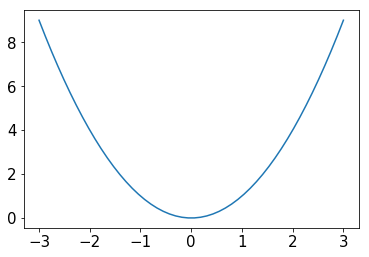

In [43]:
# Simple example of using general timer objects. This is used to update
# the time placed in the title of the figure.
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime


def update_title(axes):
    axes.set_title(datetime.now())
    axes.figure.canvas.draw()

fig, ax = plt.subplots()

x = np.linspace(-3, 3)
ax.plot(x, x*x)

# Create a new timer object. Set the interval to 100 milliseconds
# (1000 is default) and tell the timer what function should be called.
timer = fig.canvas.new_timer(interval=100)
timer.add_callback(update_title, ax)
timer.start()

# Or could start the timer on first figure draw
#def start_timer(evt):
#    timer.start()
#    fig.canvas.mpl_disconnect(drawid)
#drawid = fig.canvas.mpl_connect('draw_event', start_timer)

plt.show()

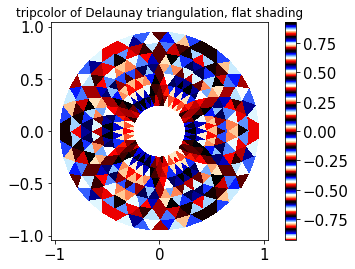

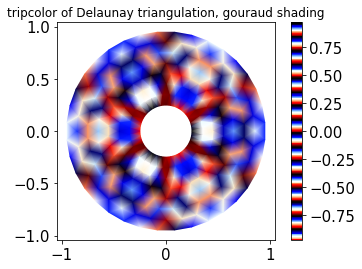

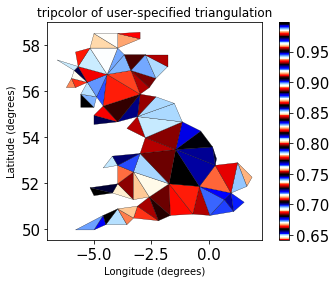

In [44]:
"""
Pseudocolor plots of unstructured triangular grids.
"""
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
import math

# Creating a Triangulation without specifying the triangles results in the
# Delaunay triangulation of the points.

# First create the x and y coordinates of the points.
n_angles = 36
n_radii = 8
min_radius = 0.25
radii = np.linspace(min_radius, 0.95, n_radii)

angles = np.linspace(0, 2*math.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
angles[:, 1::2] += math.pi/n_angles

x = (radii*np.cos(angles)).flatten()
y = (radii*np.sin(angles)).flatten()
z = (np.cos(radii)*np.cos(angles*3.0)).flatten()

# Create the Triangulation; no triangles so Delaunay triangulation created.
triang = tri.Triangulation(x, y)

# Mask off unwanted triangles.
xmid = x[triang.triangles].mean(axis=1)
ymid = y[triang.triangles].mean(axis=1)
mask = np.where(xmid*xmid + ymid*ymid < min_radius*min_radius, 1, 0)
triang.set_mask(mask)

# tripcolor plot.
plt.figure()
plt.gca().set_aspect('equal')
plt.tripcolor(triang, z, shading='flat')
plt.colorbar()
plt.title('tripcolor of Delaunay triangulation, flat shading')

# Illustrate Gouraud shading.
plt.figure()
plt.gca().set_aspect('equal')
plt.tripcolor(triang, z, shading='gouraud')
plt.colorbar()
plt.title('tripcolor of Delaunay triangulation, gouraud shading')


# You can specify your own triangulation rather than perform a Delaunay
# triangulation of the points, where each triangle is given by the indices of
# the three points that make up the triangle, ordered in either a clockwise or
# anticlockwise manner.

xy = np.asarray([
    [-0.101, 0.872], [-0.080, 0.883], [-0.069, 0.888], [-0.054, 0.890],
    [-0.045, 0.897], [-0.057, 0.895], [-0.073, 0.900], [-0.087, 0.898],
    [-0.090, 0.904], [-0.069, 0.907], [-0.069, 0.921], [-0.080, 0.919],
    [-0.073, 0.928], [-0.052, 0.930], [-0.048, 0.942], [-0.062, 0.949],
    [-0.054, 0.958], [-0.069, 0.954], [-0.087, 0.952], [-0.087, 0.959],
    [-0.080, 0.966], [-0.085, 0.973], [-0.087, 0.965], [-0.097, 0.965],
    [-0.097, 0.975], [-0.092, 0.984], [-0.101, 0.980], [-0.108, 0.980],
    [-0.104, 0.987], [-0.102, 0.993], [-0.115, 1.001], [-0.099, 0.996],
    [-0.101, 1.007], [-0.090, 1.010], [-0.087, 1.021], [-0.069, 1.021],
    [-0.052, 1.022], [-0.052, 1.017], [-0.069, 1.010], [-0.064, 1.005],
    [-0.048, 1.005], [-0.031, 1.005], [-0.031, 0.996], [-0.040, 0.987],
    [-0.045, 0.980], [-0.052, 0.975], [-0.040, 0.973], [-0.026, 0.968],
    [-0.020, 0.954], [-0.006, 0.947], [ 0.003, 0.935], [ 0.006, 0.926],
    [ 0.005, 0.921], [ 0.022, 0.923], [ 0.033, 0.912], [ 0.029, 0.905],
    [ 0.017, 0.900], [ 0.012, 0.895], [ 0.027, 0.893], [ 0.019, 0.886],
    [ 0.001, 0.883], [-0.012, 0.884], [-0.029, 0.883], [-0.038, 0.879],
    [-0.057, 0.881], [-0.062, 0.876], [-0.078, 0.876], [-0.087, 0.872],
    [-0.030, 0.907], [-0.007, 0.905], [-0.057, 0.916], [-0.025, 0.933],
    [-0.077, 0.990], [-0.059, 0.993]])
x = xy[:, 0]*180/3.14159
y = xy[:, 1]*180/3.14159

triangles = np.asarray([
    [67, 66,  1], [65,  2, 66], [ 1, 66,  2], [64,  2, 65], [63,  3, 64],
    [60, 59, 57], [ 2, 64,  3], [ 3, 63,  4], [ 0, 67,  1], [62,  4, 63],
    [57, 59, 56], [59, 58, 56], [61, 60, 69], [57, 69, 60], [ 4, 62, 68],
    [ 6,  5,  9], [61, 68, 62], [69, 68, 61], [ 9,  5, 70], [ 6,  8,  7],
    [ 4, 70,  5], [ 8,  6,  9], [56, 69, 57], [69, 56, 52], [70, 10,  9],
    [54, 53, 55], [56, 55, 53], [68, 70,  4], [52, 56, 53], [11, 10, 12],
    [69, 71, 68], [68, 13, 70], [10, 70, 13], [51, 50, 52], [13, 68, 71],
    [52, 71, 69], [12, 10, 13], [71, 52, 50], [71, 14, 13], [50, 49, 71],
    [49, 48, 71], [14, 16, 15], [14, 71, 48], [17, 19, 18], [17, 20, 19],
    [48, 16, 14], [48, 47, 16], [47, 46, 16], [16, 46, 45], [23, 22, 24],
    [21, 24, 22], [17, 16, 45], [20, 17, 45], [21, 25, 24], [27, 26, 28],
    [20, 72, 21], [25, 21, 72], [45, 72, 20], [25, 28, 26], [44, 73, 45],
    [72, 45, 73], [28, 25, 29], [29, 25, 31], [43, 73, 44], [73, 43, 40],
    [72, 73, 39], [72, 31, 25], [42, 40, 43], [31, 30, 29], [39, 73, 40],
    [42, 41, 40], [72, 33, 31], [32, 31, 33], [39, 38, 72], [33, 72, 38],
    [33, 38, 34], [37, 35, 38], [34, 38, 35], [35, 37, 36]])

xmid = x[triangles].mean(axis=1)
ymid = y[triangles].mean(axis=1)
x0 = -5
y0 = 52
zfaces = np.exp(-0.01*((xmid - x0)*(xmid - x0) + (ymid - y0)*(ymid - y0)))

# Rather than create a Triangulation object, can simply pass x, y and triangles
# arrays to tripcolor directly.  It would be better to use a Triangulation
# object if the same triangulation was to be used more than once to save
# duplicated calculations.
# Can specify one color value per face rather than one per point by using the
# facecolors kwarg.
plt.figure()
plt.gca().set_aspect('equal')
plt.tripcolor(x, y, triangles, facecolors=zfaces, edgecolors='k')
plt.colorbar()
plt.title('tripcolor of user-specified triangulation')
plt.xlabel('Longitude (degrees)')
plt.ylabel('Latitude (degrees)')

plt.show()

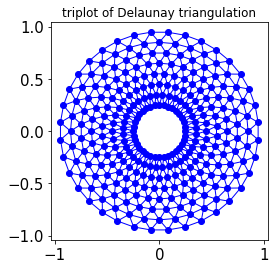

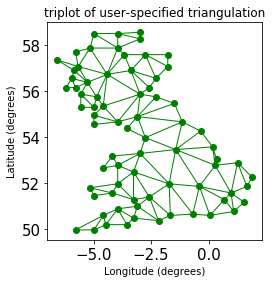

In [45]:
"""
Creating and plotting unstructured triangular grids.
"""
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
import math

# Creating a Triangulation without specifying the triangles results in the
# Delaunay triangulation of the points.

# First create the x and y coordinates of the points.
n_angles = 36
n_radii = 8
min_radius = 0.25
radii = np.linspace(min_radius, 0.95, n_radii)

angles = np.linspace(0, 2*math.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
angles[:, 1::2] += math.pi/n_angles

x = (radii*np.cos(angles)).flatten()
y = (radii*np.sin(angles)).flatten()

# Create the Triangulation; no triangles so Delaunay triangulation created.
triang = tri.Triangulation(x, y)

# Mask off unwanted triangles.
xmid = x[triang.triangles].mean(axis=1)
ymid = y[triang.triangles].mean(axis=1)
mask = np.where(xmid*xmid + ymid*ymid < min_radius*min_radius, 1, 0)
triang.set_mask(mask)

# Plot the triangulation.
plt.figure()
plt.gca().set_aspect('equal')
plt.triplot(triang, 'bo-', lw=1)
plt.title('triplot of Delaunay triangulation')


# You can specify your own triangulation rather than perform a Delaunay
# triangulation of the points, where each triangle is given by the indices of
# the three points that make up the triangle, ordered in either a clockwise or
# anticlockwise manner.

xy = np.asarray([
    [-0.101, 0.872], [-0.080, 0.883], [-0.069, 0.888], [-0.054, 0.890],
    [-0.045, 0.897], [-0.057, 0.895], [-0.073, 0.900], [-0.087, 0.898],
    [-0.090, 0.904], [-0.069, 0.907], [-0.069, 0.921], [-0.080, 0.919],
    [-0.073, 0.928], [-0.052, 0.930], [-0.048, 0.942], [-0.062, 0.949],
    [-0.054, 0.958], [-0.069, 0.954], [-0.087, 0.952], [-0.087, 0.959],
    [-0.080, 0.966], [-0.085, 0.973], [-0.087, 0.965], [-0.097, 0.965],
    [-0.097, 0.975], [-0.092, 0.984], [-0.101, 0.980], [-0.108, 0.980],
    [-0.104, 0.987], [-0.102, 0.993], [-0.115, 1.001], [-0.099, 0.996],
    [-0.101, 1.007], [-0.090, 1.010], [-0.087, 1.021], [-0.069, 1.021],
    [-0.052, 1.022], [-0.052, 1.017], [-0.069, 1.010], [-0.064, 1.005],
    [-0.048, 1.005], [-0.031, 1.005], [-0.031, 0.996], [-0.040, 0.987],
    [-0.045, 0.980], [-0.052, 0.975], [-0.040, 0.973], [-0.026, 0.968],
    [-0.020, 0.954], [-0.006, 0.947], [ 0.003, 0.935], [ 0.006, 0.926],
    [ 0.005, 0.921], [ 0.022, 0.923], [ 0.033, 0.912], [ 0.029, 0.905],
    [ 0.017, 0.900], [ 0.012, 0.895], [ 0.027, 0.893], [ 0.019, 0.886],
    [ 0.001, 0.883], [-0.012, 0.884], [-0.029, 0.883], [-0.038, 0.879],
    [-0.057, 0.881], [-0.062, 0.876], [-0.078, 0.876], [-0.087, 0.872],
    [-0.030, 0.907], [-0.007, 0.905], [-0.057, 0.916], [-0.025, 0.933],
    [-0.077, 0.990], [-0.059, 0.993]])
x = np.degrees(xy[:, 0])
y = np.degrees(xy[:, 1])

triangles = np.asarray([
    [67, 66,  1], [65,  2, 66], [ 1, 66,  2], [64,  2, 65], [63,  3, 64],
    [60, 59, 57], [ 2, 64,  3], [ 3, 63,  4], [ 0, 67,  1], [62,  4, 63],
    [57, 59, 56], [59, 58, 56], [61, 60, 69], [57, 69, 60], [ 4, 62, 68],
    [ 6,  5,  9], [61, 68, 62], [69, 68, 61], [ 9,  5, 70], [ 6,  8,  7],
    [ 4, 70,  5], [ 8,  6,  9], [56, 69, 57], [69, 56, 52], [70, 10,  9],
    [54, 53, 55], [56, 55, 53], [68, 70,  4], [52, 56, 53], [11, 10, 12],
    [69, 71, 68], [68, 13, 70], [10, 70, 13], [51, 50, 52], [13, 68, 71],
    [52, 71, 69], [12, 10, 13], [71, 52, 50], [71, 14, 13], [50, 49, 71],
    [49, 48, 71], [14, 16, 15], [14, 71, 48], [17, 19, 18], [17, 20, 19],
    [48, 16, 14], [48, 47, 16], [47, 46, 16], [16, 46, 45], [23, 22, 24],
    [21, 24, 22], [17, 16, 45], [20, 17, 45], [21, 25, 24], [27, 26, 28],
    [20, 72, 21], [25, 21, 72], [45, 72, 20], [25, 28, 26], [44, 73, 45],
    [72, 45, 73], [28, 25, 29], [29, 25, 31], [43, 73, 44], [73, 43, 40],
    [72, 73, 39], [72, 31, 25], [42, 40, 43], [31, 30, 29], [39, 73, 40],
    [42, 41, 40], [72, 33, 31], [32, 31, 33], [39, 38, 72], [33, 72, 38],
    [33, 38, 34], [37, 35, 38], [34, 38, 35], [35, 37, 36]])

# Rather than create a Triangulation object, can simply pass x, y and triangles
# arrays to triplot directly.  It would be better to use a Triangulation object
# if the same triangulation was to be used more than once to save duplicated
# calculations.
plt.figure()
plt.gca().set_aspect('equal')
plt.triplot(x, y, triangles, 'go-', lw=1.0)
plt.title('triplot of user-specified triangulation')
plt.xlabel('Longitude (degrees)')
plt.ylabel('Latitude (degrees)')

plt.show()